# Введение в машинное обучение

## Семинар #5

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Деревья решений (Decision Trees). Случайный лес (Random Forest)

## 1. Деревья решений (Decision Trees)

Дерево принятия решений (также может называться деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.  

Источники:
1. Лекция https://ru.coursera.org/lecture/supervised-learning/rieshaiushchiie-dieriev-ia-HZxD1 
2. https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
3. https://habr.com/ru/post/171759/
4. https://www.hse.ru/mirror/pubs/share/215285956

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Recap прошлого занятия: классификация на выборке ирисов kNN

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


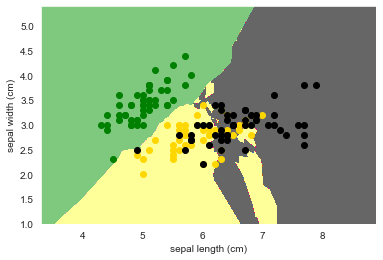

In [4]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [5]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9333333333333333


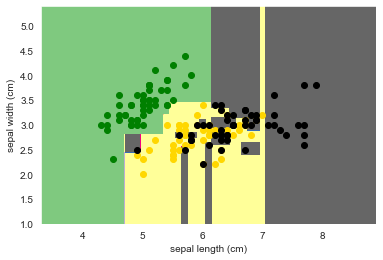

In [6]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = DecisionTreeClassifier(random_state=42).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [7]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Деревья решений можно визуализировать:

Пример классификации данного датасета
    
!['деревьеярешений'](https://scikit-learn.org/stable/_images/iris.png)

### Как переобучиться на Деревьях Решений?

Далее в коде закомментирована рисовалка решающего правила для деревьев решений. Если у вас она не ставится с первого раза - оставьте попытки, она не пригодится дальше нигде.

In [8]:
pair = [0, 1]
X = X_train[:, pair]
y = y_train

clf = DecisionTreeClassifier(max_depth = 30, random_state = 42).fit(X, y)  # min_samples_split --?

# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                  feature_names=['petal length', 
#                                                 'petal width'],  
#                                  class_names=iris.target_names,  
#                                  filled=True, rounded=True,
#                                  special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))

0.6444444444444445


In [60]:
pair = [0, 1]
X = X_train[:, pair]
y = y_train

clf = DecisionTreeClassifier(max_depth = 2, random_state = 42).fit(X, y)  # min_samples_split --?

# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                  feature_names=['petal length', 
#                                                 'petal width'],  
#                                  class_names=iris.target_names,  
#                                  filled=True, rounded=True,
#                                  special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))

0.9122807017543859


In [61]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [63]:
clf = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 5, random_state = 42).fit(X, y)

# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                  feature_names=['petal length', 
#                                                 'petal width'],  
#                                  class_names=iris.target_names,  
#                                  filled=True, rounded=True,
#                                  special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))

0.8830409356725146


Посмотрим на справку функции в `sklearn`:

In [11]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Выбор критерия:
    http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf

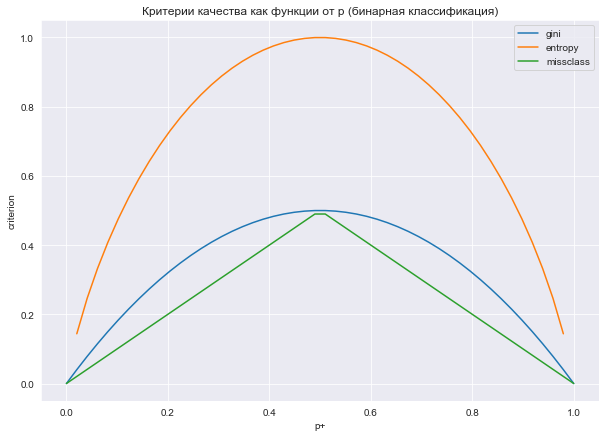

In [12]:
plt.rcParams['figure.figsize'] = (10,7)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p (бинарная классификация)')
plt.legend();

### Регрессия на Деревьях Решений:

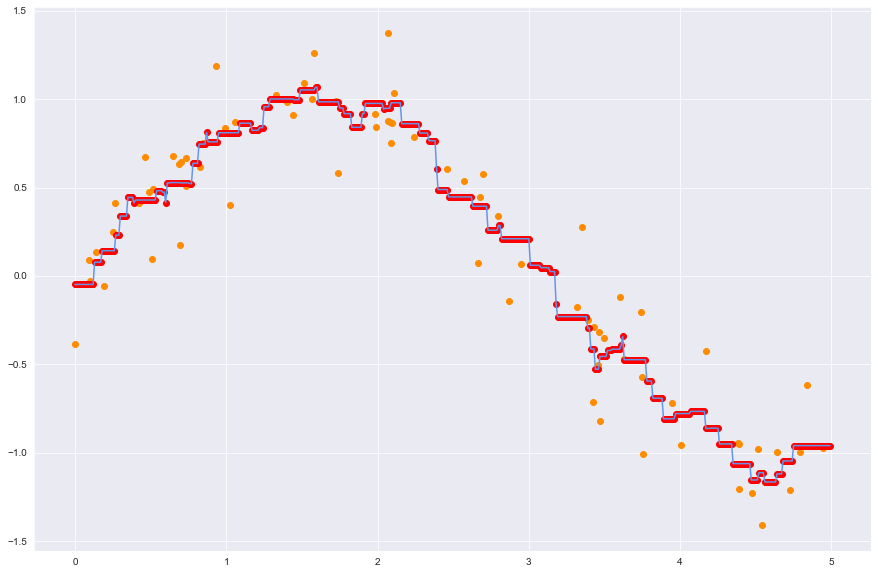

In [13]:
# Recap KNN 
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors = 5, 
                         ).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.scatter(X_test, y_, c='red', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

In [14]:
X.shape, y.shape

((80, 1), (80,))

In [15]:
y_.shape, X_test.shape

((500,), (500, 1))

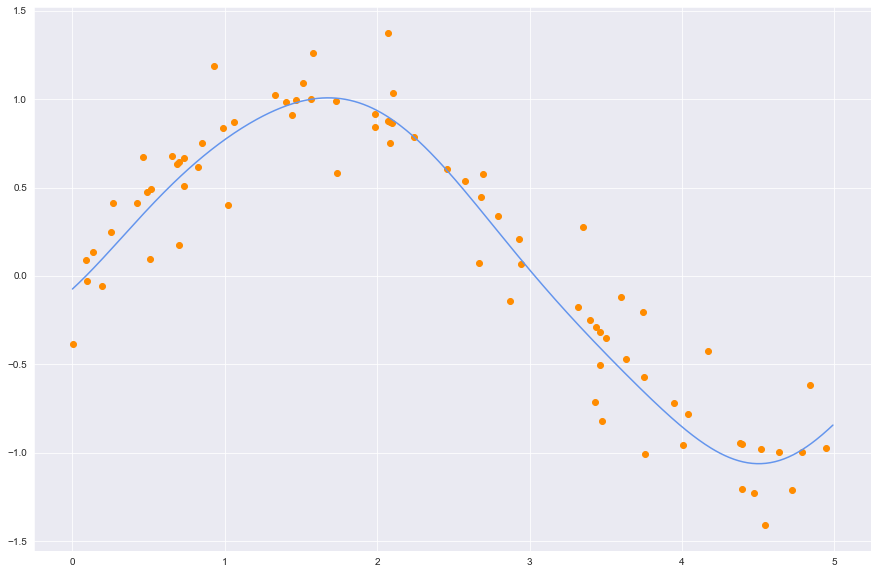

In [16]:
from sklearn.svm import SVR

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = SVR().fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

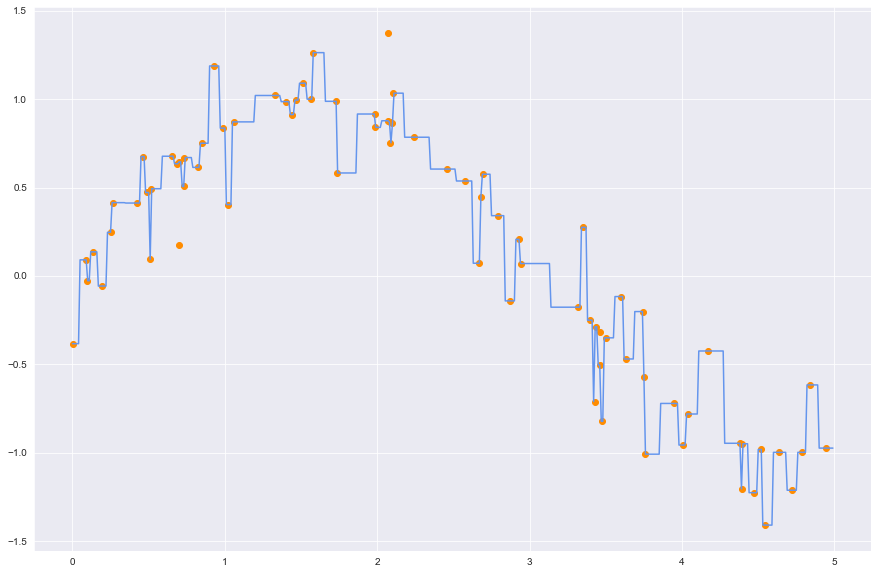

In [17]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = DecisionTreeRegressor().fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

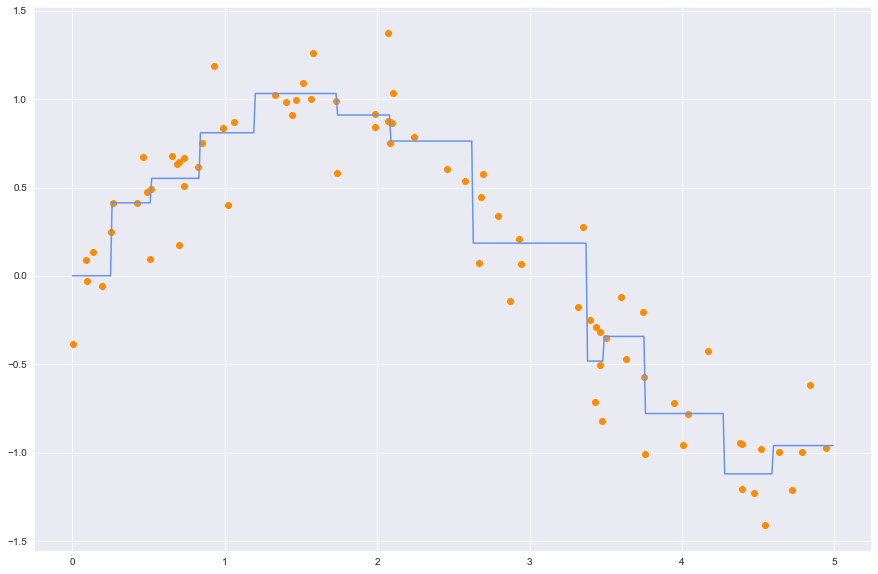

In [18]:
clf = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

В каком из этих трех случаев модель переобучилась? Почему?

Почему не воспроизводится результат DTC на дефолтных параметрах?

In [19]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 2. Леса решений: Random Forest Classification (Regression)

In [20]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, stratify=wine.target, random_state=42)

In [21]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [22]:
wine.data.shape

(178, 13)

In [23]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.976
Accuracy on the test set: 0.981


In [24]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state = 42, warm_start=True) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 0.995
Accuracy on the test set: 0.959


In [67]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.05345228, 0.00890434, 0.09946042, 0.02043491, 0.00671401,
       0.00392343, 0.01068356, 0.10084464, 0.00131751, 0.00351736,
       0.01551914, 0.00397771, 0.00818079, 0.07228681, 0.0033557 ,
       0.00184232, 0.00829932, 0.00171284, 0.00455263, 0.00978905,
       0.11229453, 0.01827737, 0.02970105, 0.09103758, 0.00578151,
       0.03579523, 0.08234471, 0.1730313 , 0.00672132, 0.00624663])

In [68]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.05345228, 0.00890434, 0.09946042, 0.02043491, 0.00671401,
       0.00392343, 0.01068356, 0.10084464, 0.00131751, 0.00351736,
       0.01551914, 0.00397771, 0.00818079, 0.07228681, 0.0033557 ,
       0.00184232, 0.00829932, 0.00171284, 0.00455263, 0.00978905,
       0.11229453, 0.01827737, 0.02970105, 0.09103758, 0.00578151,
       0.03579523, 0.08234471, 0.1730313 , 0.00672132, 0.00624663])

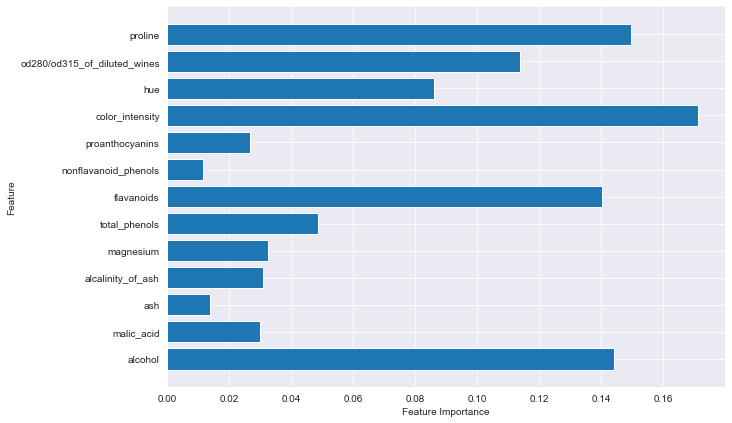

In [28]:
#Feature Importance
n_feature = wine.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), wine.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

In [29]:
X_train=pd.DataFrame(X_train, columns=wine.feature_names)
X_train.drop(['color_intensity','alcohol'], axis=1, inplace=True)

X_test=pd.DataFrame(X_test, columns=wine.feature_names)
X_test.drop(['color_intensity','alcohol'], axis=1, inplace=True)

In [30]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.852


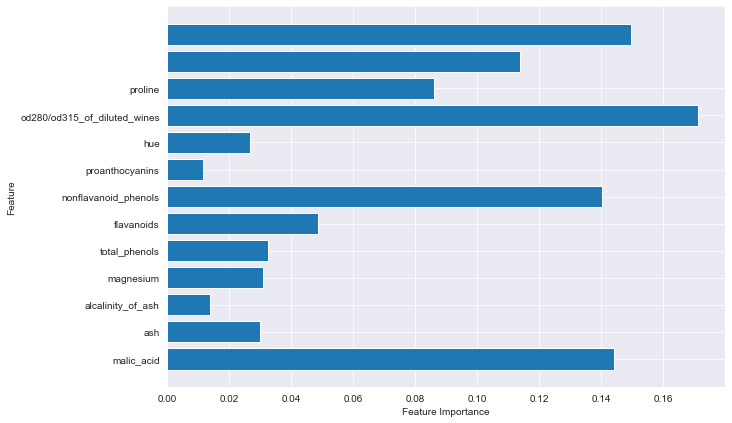

In [31]:
#Feature Importance
n_feature = X_train.shape[1]
plt.barh(range(rfc.feature_importances_.shape[0]), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

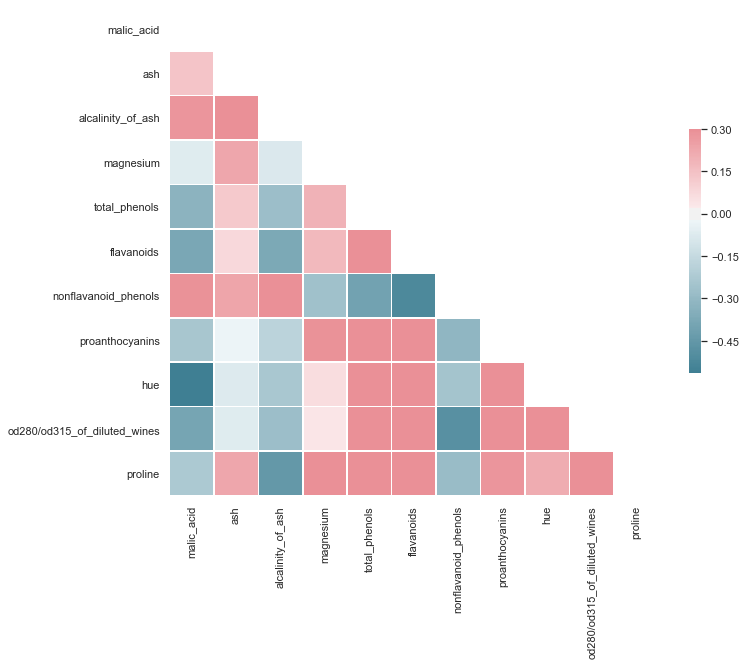

In [32]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(X_train)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
wine.feature_names[10]

'hue'

In [70]:
from sklearn.feature_selection import SelectKBest

In [71]:
skb = SelectKBest(k = 10)
X = skb.fit_transform(wine.data, wine.target)

In [72]:
X.shape

(178, 10)

In [73]:
skb.get_params()

{'k': 10,
 'score_func': <function sklearn.feature_selection.univariate_selection.f_classif(X, y)>}

In [74]:
skb.scores_

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

In [34]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [35]:
X_train = pd.DataFrame(X_train)
X_train = X_train[X_train.columns[:2]]
X_test = pd.DataFrame(X_test)
X_test = X_test[X_test.columns[:2]]
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.463


In [75]:
dtc.feature_importances_

array([0.04785318, 0.01162118, 0.43067576, 0.11033074, 0.03275167,
       0.03920412, 0.07972273, 0.03595327, 0.13004877, 0.0818386 ])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

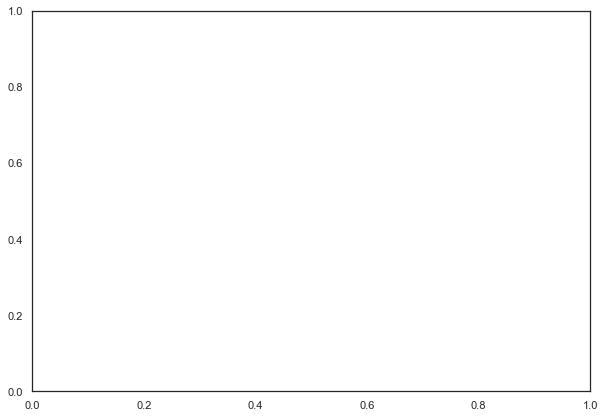

In [77]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, stratify=wine.target, random_state=42)

#Feature Importance
n_feature = X_train.shape[1]
plt.barh(range(n_feature), dtc.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
from sklearn.model_selection import KFold

In [39]:
kfold = KFold(n_splits = 10, shuffle= True)
for train_index, test_index in kfold.split(X, y):
    print(test_index)

[ 3 26 29 34 43 46 73 78]
[ 4  7  9 41 56 58 65 79]
[ 0  1  5 35 54 63 67 69]
[10 15 21 37 44 52 60 62]
[ 2 13 30 40 48 55 57 72]
[ 6 23 25 28 38 42 45 53]
[ 8 18 20 22 27 47 61 77]
[11 16 24 31 32 49 75 76]
[17 19 39 50 51 64 68 70]
[12 14 33 36 59 66 71 74]


In [78]:
i = 0
list_ = []
kfold = KFold(n_splits = 10)
X = wine.data
y = wine.target

dtc = DecisionTreeClassifier()
for train_index, test_index in kfold.split(X_train, y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))    

Fold # 0
0.9230769230769231
Fold # 1
0.8461538461538461
Fold # 2
1.0
Fold # 3
0.8461538461538461
Fold # 4
1.0
Fold # 5
0.8333333333333334
Fold # 6
1.0
Fold # 7
1.0
Fold # 8
1.0
Fold # 9
0.6666666666666666


In [41]:
i = 0
list_1 = []
kfold = KFold(n_splits = 10)
X = wine.data
y = wine.target

dtc = RandomForestClassifier()
for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_1.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))   

Fold # 0
1.0
Fold # 1
0.8888888888888888
Fold # 2
0.9444444444444444
Fold # 3
0.8333333333333334
Fold # 4
0.8888888888888888
Fold # 5
1.0
Fold # 6
0.9444444444444444
Fold # 7
0.7777777777777778
Fold # 8
0.7647058823529411
Fold # 9
1.0


In [42]:
np.mean(list_), np.std(list_)

(0.8490196078431372, 0.09254541922763082)

In [43]:
np.mean(list_1), np.std(list_1)

(0.9042483660130719, 0.08467836739431518)

In [44]:
import scipy

scipy.stats.ttest_rel(list_1,list_)

Ttest_relResult(statistic=2.457894742007158, pvalue=0.0362837455780928)

#### Вопрос: как данную модель интерпретировать? Как Дерево решений построило решающее правило?

### Задача 1.  
Сравнить решающее правило на Деревьях Решений и Случайных Лесов Решений для регрессионной задачи на выборке `sklearn.datasets.diabets`

In [45]:
# Визуализации Линейной Регрессии по одному признаку
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [48]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [49]:
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [50]:
y_test.max(), y_test.min()

(310.0, 37.0)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
y_train = scaler.fit_transform(pd.DataFrame(y_train))
y_test = scaler.transform(pd.DataFrame(y_test))

In [53]:
# non sclaed
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor(random_state=42) 
dtc.fit( X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: -0.103


In [54]:
dtc.score(X_test,y_test)

-0.10304408181633183

In [55]:
# non scaled
from sklearn.ensemble import RandomForestRegressor

dtc = RandomForestRegressor(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 0.871
Accuracy on the test set: 0.411


##  Вопросы для самопроверки:

1. В чем отличие Decision Trees от Random Forest?
2. На что влияют критерии построения решающего правила в деревьях?
3. Как интерпретировать результат модели RFC?
4. Почему  важно варьировать `max_depth` дерева?

## Выводы:

1. Дерево – интерпретируемый алгоритм (пока оно не очень глубокое). Random Forest – не интерпретируемый алгоритм
1. Параметр глубины дерева max_depth нужно находить исходя из компромисс между underfitting и overfitting! Можно переобучиться и на тестовом датасете
4. Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
2. Построение дерева DTC и качество модели сильно зависит от того, удачно ли были выбраны сплиты в начале построения!  
3. Стандартной реализации для задачи регрессии вам доступны критерии gini, entropy 
5. Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)

## Задача 2. 
Мы уже знаем 4 принципаильно разных классификатора: LR, KNN, SVC, RFC. 
Сравнить их точности предсказания на датасете `breast cancer`. Использовать классификаторы с натройками по умолчанию. Разбить данные на `train`  и  `test`.

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

random_state  = 42

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svc= SVC()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

random_state = 42
models = <YOUR CODE>

for model in models:
    <YOUR CODE># fit the model
    predictions = model.predict(X_test)
    print(str(model)[:10], accuracy_score(y_test, predictions))   

SyntaxError: invalid syntax (<ipython-input-59-e27177211d56>, line 5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
pipe = Pipeline(<YOUR CODE>
)

# Create space of candidate values
search_space = [<YOUR CODE>
]
# Create grid search 

clf = GridSearchCV(<YOUR CODE>
                  ).fit(X_train, y_train)

In [ ]:
clf.best_estimator_.score(X_test, y_test)

#### Посомтреть результаты поиска по гиперапараметрам:

Вопрос: какая модель называется лучшей (по каким критериям)?

## Задача 3 (Домашнее задание).

1. Построить `feature importances` для каждого классифкатора, посмотреть, какие признаки учавствуют в построении решающего правила
2. Вывести индексы пациентов тестовой выборки, на которых ошибаются классификаторы
3. Вывести все параметры пациентов, сравнить со средними значениями по выборке

## Задача 4 (Домашнее задание). 
Варьировать параметры классификатора для достижения лучшего `score` на тестовой выборке. Внести результат в турнирную таблицу.

Что можно сказать по поводу переобучения при таком дизайне эксперимента?    